In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.sbe_solver import SBESolver
from src.params import PARAMS

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)


## Experiment 1: Varying Coupling Strength χ₀

Test how the field strength affects the absorption spectrum and carrier dynamics.

Running simulation for χ₀ = 0.001...
Running simulation for χ₀ = 0.01...
Running simulation for χ₀ = 0.1...
Running simulation for χ₀ = 0.5...
Running simulation for χ₀ = 1.0...
Running simulation for χ₀ = 2.0...


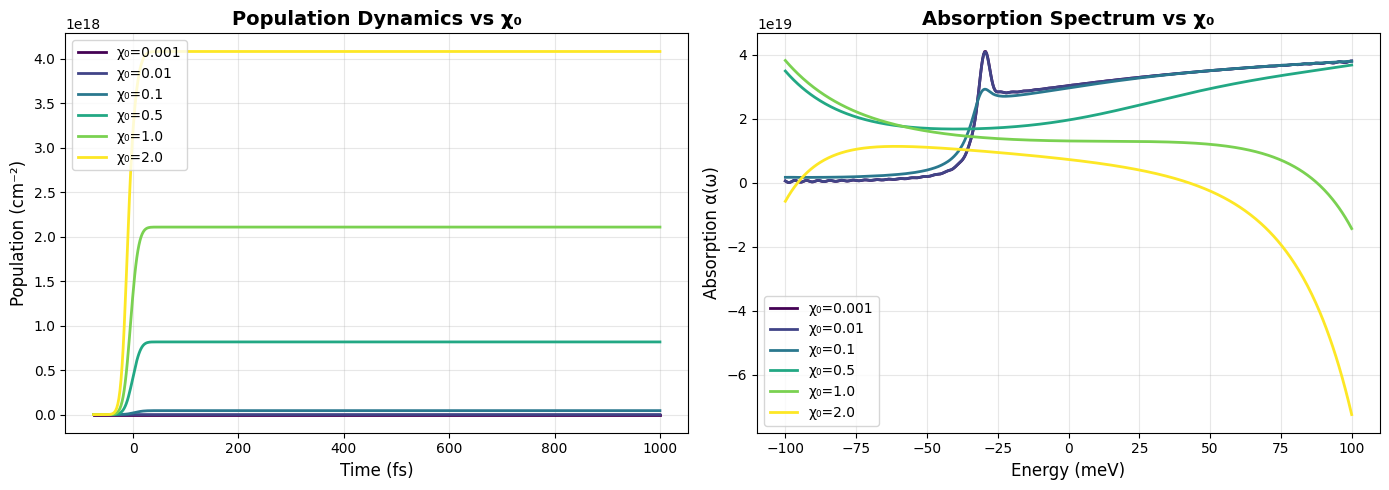

✓ Experiment 1 completed!


In [ ]:
# Vary coupling strength
chi0_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(chi0_values)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for i, chi0 in enumerate(chi0_values):
    print(f"Running simulation for χ₀ = {chi0}...")
    
    solver = SBESolver()
    solver.fit(
        chi_0=chi0,
        delta_t=PARAMS['delta_t'],
        Delta_0=PARAMS['Delta_0'],
        E_R=PARAMS['E_R'],
        T2_0=PARAMS['T2_0'],
        gamma=PARAMS['gamma'],
        hbar=PARAMS['hbar'],
        N=PARAMS['N'],
        Delta_epsilon=PARAMS['Delta_epsilon'],
        t_0=PARAMS['t_0'],
        t_max=PARAMS['t_max'],
        dt=PARAMS['dt'],
        C_0=PARAMS['C_0'],
        with_coulomb=True
    )
    
    # Plot population
    ax1.plot(solver.t, solver.population, label=f'χ₀={chi0}', color=colors[i], linewidth=2)
    
    # Plot absorption spectrum
    ax2.plot(solver.spectrum_energy, solver.absorption_spectrum, 
             label=f'χ₀={chi0}', color=colors[i], linewidth=2)

ax1.set_xlabel('Time (fs)', fontsize=12)
ax1.set_ylabel('Population (cm⁻²)', fontsize=12)
ax1.set_title('Population Dynamics vs χ₀', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_xlabel('Energy (meV)', fontsize=12)
ax2.set_ylabel('Absorption α(ω)', fontsize=12)
ax2.set_title('Absorption Spectrum vs χ₀', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../result/chi0_variation.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Experiment 1 completed!")

## Experiment 2: Varying Laser Detuning Δ₀

Scan the laser frequency across different exciton transitions.

Running simulation for Δ₀ = 8.4 meV (n≈1.4)...
Running simulation for Δ₀ = 12.6 meV (n≈1.7)...
Running simulation for Δ₀ = 21.0 meV (n≈2.2)...
Running simulation for Δ₀ = 29.4 meV (n≈2.6)...
Running simulation for Δ₀ = 42.0 meV (n≈3.2)...


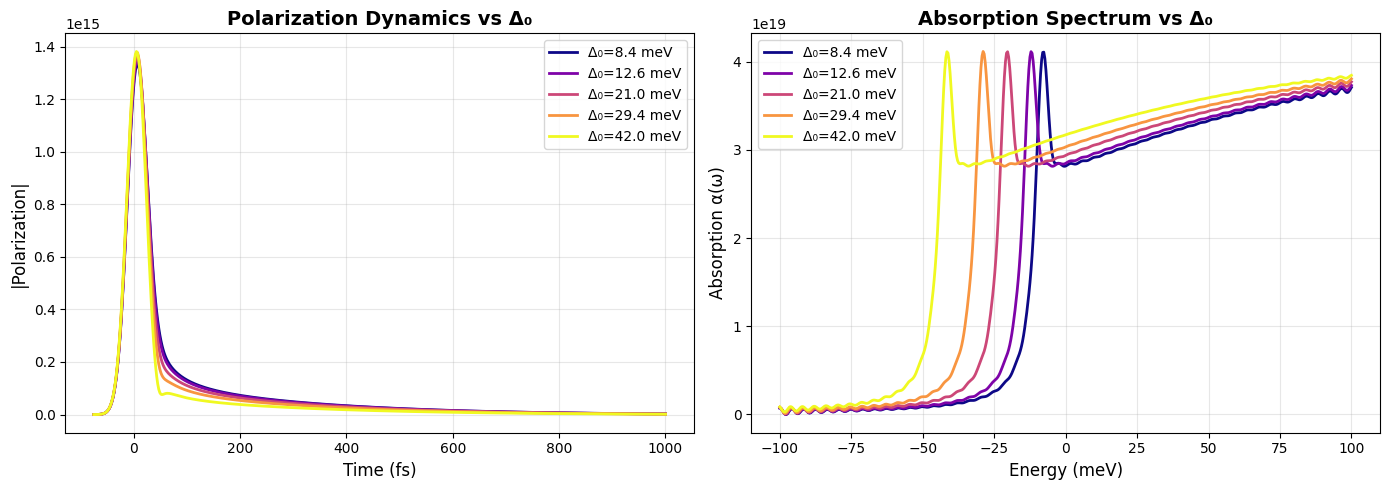

✓ Experiment 2 completed!


In [ ]:
# Vary detuning (in units of Rydberg energy)
E_R = PARAMS['E_R']
delta0_values = [2*E_R, 3*E_R, 5*E_R, 7*E_R, 10*E_R]  # Different exciton states
colors = plt.cm.plasma(np.linspace(0, 1, len(delta0_values)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for i, delta0 in enumerate(delta0_values):
    n_eff = np.sqrt(delta0 / E_R)  # Effective quantum number
    print(f"Running simulation for Δ₀ = {delta0:.1f} meV (n≈{n_eff:.1f})...")
    
    solver = SBESolver()
    solver.fit(
        chi_0=PARAMS['chi_0'],
        delta_t=PARAMS['delta_t'],
        Delta_0=delta0,
        E_R=PARAMS['E_R'],
        T2_0=PARAMS['T2_0'],
        gamma=PARAMS['gamma'],
        hbar=PARAMS['hbar'],
        N=PARAMS['N'],
        Delta_epsilon=PARAMS['Delta_epsilon'],
        t_0=PARAMS['t_0'],
        t_max=PARAMS['t_max'],
        dt=PARAMS['dt'],
        C_0=PARAMS['C_0'],
        with_coulomb=True
    )
    
    # Plot polarization magnitude
    ax1.plot(solver.t, np.abs(solver.polarization), 
             label=f'Δ₀={delta0:.1f} meV', color=colors[i], linewidth=2)
    
    # Plot absorption spectrum
    ax2.plot(solver.spectrum_energy, solver.absorption_spectrum, 
             label=f'Δ₀={delta0:.1f} meV', color=colors[i], linewidth=2)

ax1.set_xlabel('Time (fs)', fontsize=12)
ax1.set_ylabel('|Polarization|', fontsize=12)
ax1.set_title('Polarization Dynamics vs Δ₀', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_xlabel('Energy (meV)', fontsize=12)
ax2.set_ylabel('Absorption α(ω)', fontsize=12)
ax2.set_title('Absorption Spectrum vs Δ₀', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../result/delta0_variation.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Experiment 2 completed!")

## Experiment 3: Varying Dephasing Time T₂

Study the effect of decoherence on spectral linewidth.

Running simulation for T₂ = 50 fs...
Running simulation for T₂ = 100 fs...
Running simulation for T₂ = 200 fs...
Running simulation for T₂ = 400 fs...
Running simulation for T₂ = 800 fs...


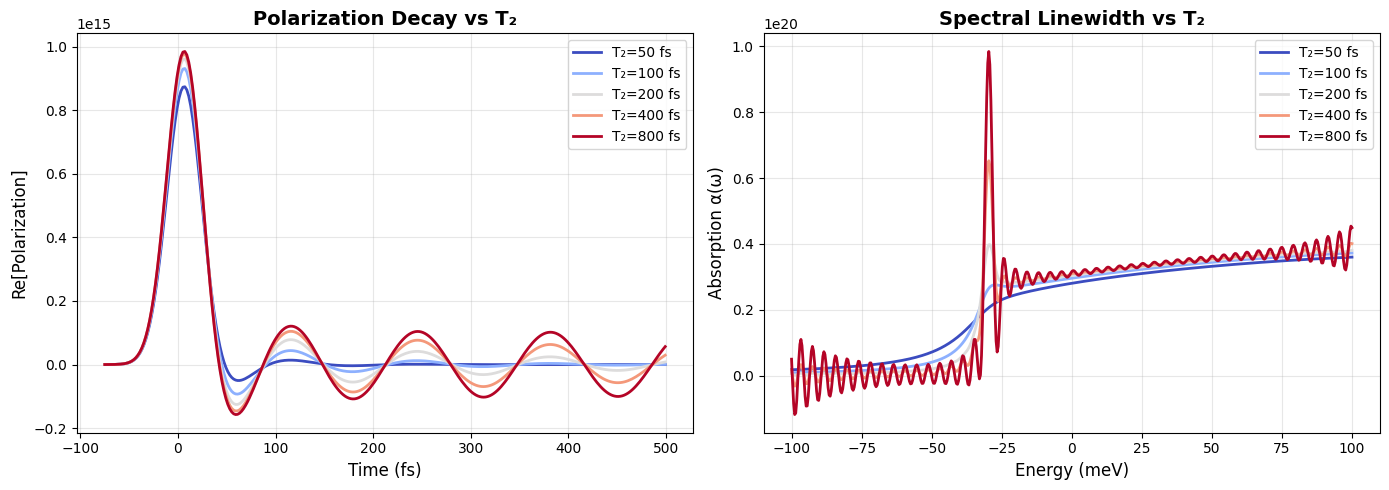

✓ Experiment 3 completed!


In [ ]:
# Vary dephasing time
T2_values = [50, 100, 200, 400, 800]  # fs
colors = plt.cm.coolwarm(np.linspace(0, 1, len(T2_values)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for i, T2 in enumerate(T2_values):
    print(f"Running simulation for T₂ = {T2} fs...")
    
    solver = SBESolver()
    solver.fit(
        chi_0=PARAMS['chi_0'],
        delta_t=PARAMS['delta_t'],
        Delta_0=PARAMS['Delta_0'],
        E_R=PARAMS['E_R'],
        T2_0=T2,
        gamma=PARAMS['gamma'],
        hbar=PARAMS['hbar'],
        N=PARAMS['N'],
        Delta_epsilon=PARAMS['Delta_epsilon'],
        t_0=PARAMS['t_0'],
        t_max=PARAMS['t_max'],
        dt=PARAMS['dt'],
        C_0=PARAMS['C_0'],
        with_coulomb=True
    )
    
    # Plot polarization (zoom in on decay)
    mask = solver.t < 500  # First 500 fs
    ax1.plot(solver.t[mask], solver.polarization.real[mask], 
             label=f'T₂={T2} fs', color=colors[i], linewidth=2)
    
    # Plot absorption spectrum (focus on peak)
    ax2.plot(solver.spectrum_energy, solver.absorption_spectrum, 
             label=f'T₂={T2} fs', color=colors[i], linewidth=2)

ax1.set_xlabel('Time (fs)', fontsize=12)
ax1.set_ylabel('Re[Polarization]', fontsize=12)
ax1.set_title('Polarization Decay vs T₂', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_xlabel('Energy (meV)', fontsize=12)
ax2.set_ylabel('Absorption α(ω)', fontsize=12)
ax2.set_title('Spectral Linewidth vs T₂', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../result/T2_variation.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Experiment 3 completed!")

## Experiment 4: Coulomb Enhancement

Direct comparison of absorption with and without Coulomb interactions.

Running with Coulomb...
Running without Coulomb...


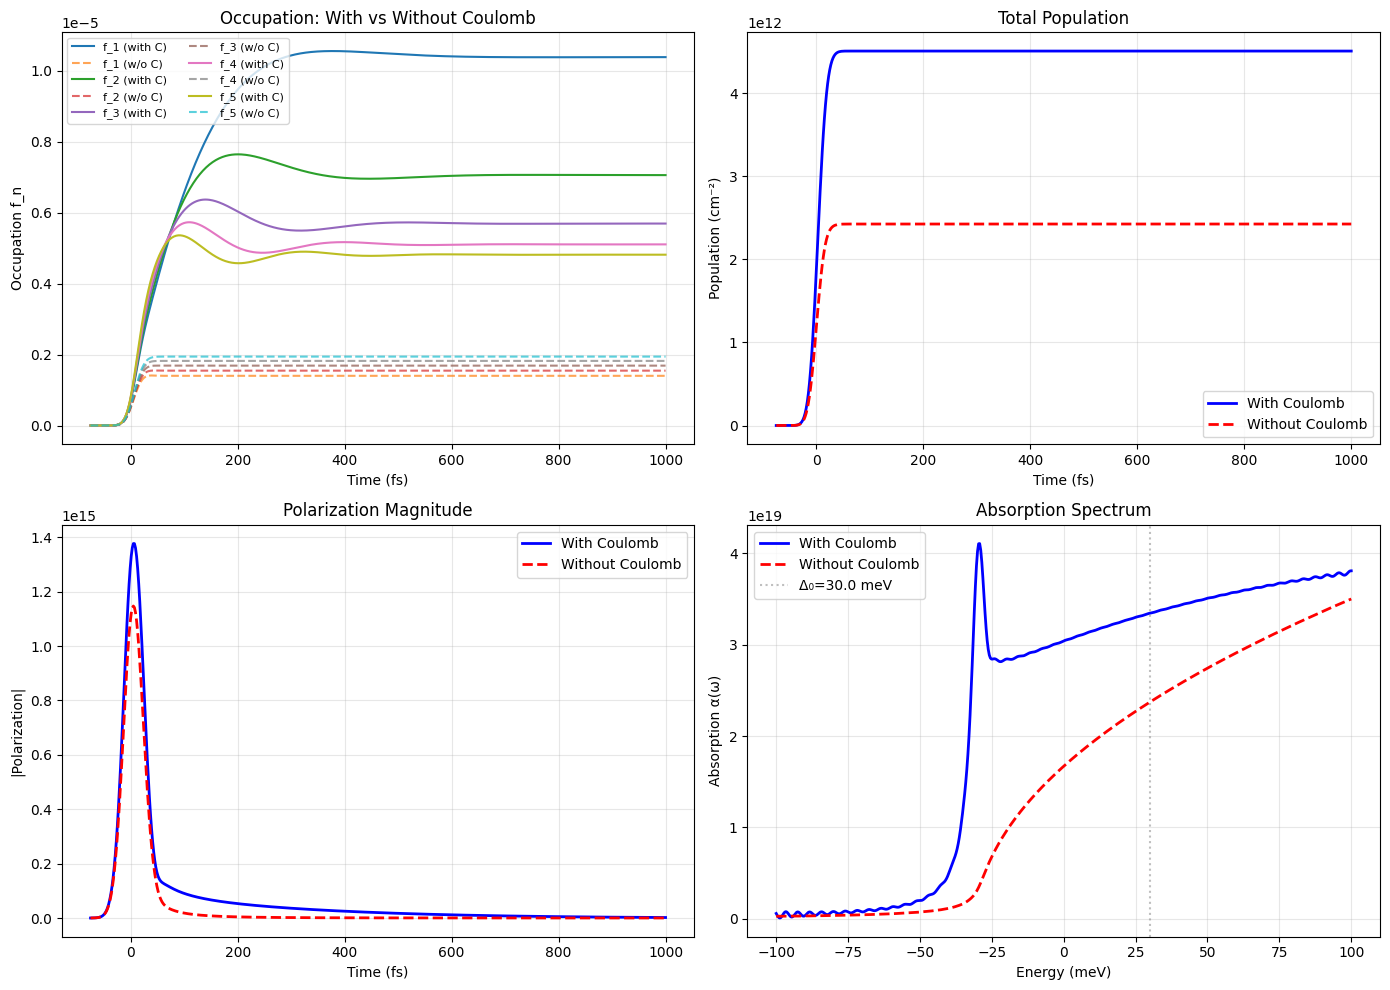


✓ Experiment 4 completed!
Coulomb enhancement factor: 1.2x


In [ ]:
print("Running with Coulomb...")
solver_with = SBESolver()
solver_with.fit(**PARAMS, with_coulomb=True)

print("Running without Coulomb...")
solver_without = SBESolver()
solver_without.fit(**PARAMS, with_coulomb=False)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# f_n comparison
ax1 = axes[0, 0]
for i in range(5):
    ax1.plot(solver_with.t, solver_with.f_n[:, i], label=f'f_{i+1} (with C)', linestyle='-')
    ax1.plot(solver_without.t, solver_without.f_n[:, i], label=f'f_{i+1} (w/o C)', linestyle='--', alpha=0.7)
ax1.set_xlabel('Time (fs)')
ax1.set_ylabel('Occupation f_n')
ax1.set_title('Occupation: With vs Without Coulomb')
ax1.legend(ncol=2, fontsize=8)
ax1.grid(True, alpha=0.3)

# Population comparison
ax2 = axes[0, 1]
ax2.plot(solver_with.t, solver_with.population, 'b-', linewidth=2, label='With Coulomb')
ax2.plot(solver_without.t, solver_without.population, 'r--', linewidth=2, label='Without Coulomb')
ax2.set_xlabel('Time (fs)')
ax2.set_ylabel('Population (cm⁻²)')
ax2.set_title('Total Population')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Polarization comparison
ax3 = axes[1, 0]
ax3.plot(solver_with.t, np.abs(solver_with.polarization), 'b-', linewidth=2, label='With Coulomb')
ax3.plot(solver_without.t, np.abs(solver_without.polarization), 'r--', linewidth=2, label='Without Coulomb')
ax3.set_xlabel('Time (fs)')
ax3.set_ylabel('|Polarization|')
ax3.set_title('Polarization Magnitude')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Absorption comparison
ax4 = axes[1, 1]
ax4.plot(solver_with.spectrum_energy, solver_with.absorption_spectrum, 
         'b-', linewidth=2, label='With Coulomb')
ax4.plot(solver_without.spectrum_energy, solver_without.absorption_spectrum, 
         'r--', linewidth=2, label='Without Coulomb')
ax4.axvline(PARAMS['Delta_0'], color='gray', linestyle=':', alpha=0.5, label=f"Δ₀={PARAMS['Delta_0']:.1f} meV")
ax4.set_xlabel('Energy (meV)')
ax4.set_ylabel('Absorption α(ω)')
ax4.set_title('Absorption Spectrum')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../result/coulomb_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate enhancement factor
peak_idx_with = np.argmax(solver_with.absorption_spectrum)
peak_idx_without = np.argmax(solver_without.absorption_spectrum)
enhancement = solver_with.absorption_spectrum[peak_idx_with] / solver_without.absorption_spectrum[peak_idx_without]

print(f"\n✓ Experiment 4 completed!")
print(f"Coulomb enhancement factor: {enhancement:.1f}x")

## Experiment 5: Pulse Width Variation

Study how pulse duration affects the spectral bandwidth and carrier excitation.

Running simulation for δt = 10 fs...
Running simulation for δt = 25 fs...
Running simulation for δt = 50 fs...
Running simulation for δt = 100 fs...
Running simulation for δt = 200 fs...


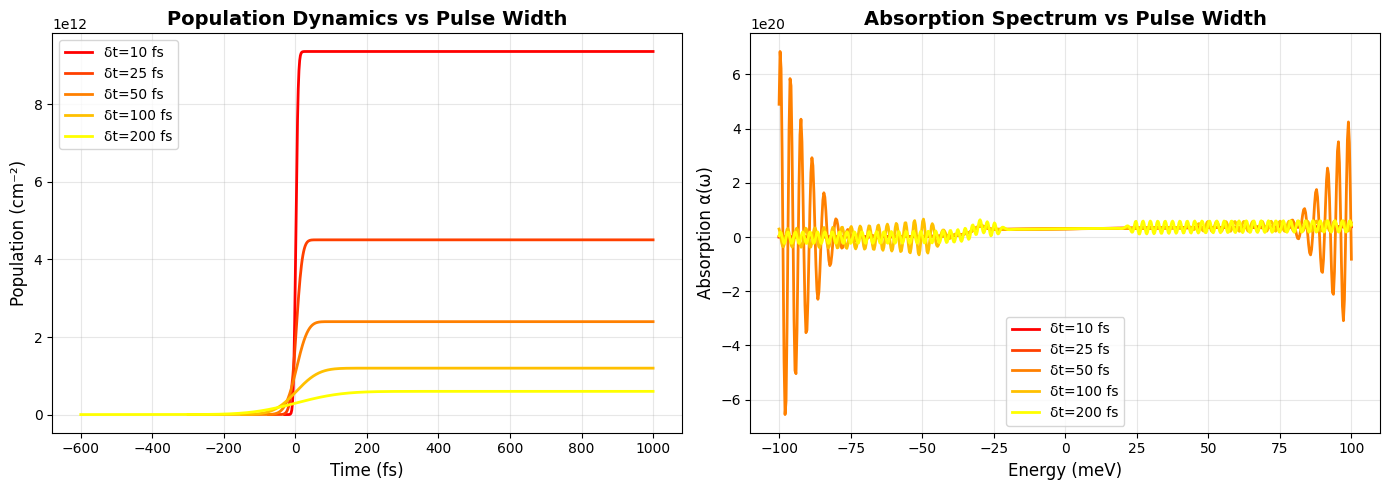

✓ Experiment 5 completed!


In [ ]:
# Vary pulse width
delta_t_values = [10, 25, 50, 100, 200]  # fs
colors = plt.cm.autumn(np.linspace(0, 1, len(delta_t_values)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for i, delta_t in enumerate(delta_t_values):
    print(f"Running simulation for δt = {delta_t} fs...")
    
    solver = SBESolver()
    solver.fit(
        chi_0=PARAMS['chi_0'],
        delta_t=delta_t,
        Delta_0=PARAMS['Delta_0'],
        E_R=PARAMS['E_R'],
        T2_0=PARAMS['T2_0'],
        gamma=PARAMS['gamma'],
        hbar=PARAMS['hbar'],
        N=PARAMS['N'],
        Delta_epsilon=PARAMS['Delta_epsilon'],
        t_0=-3*delta_t,  # Adjust initial time
        t_max=PARAMS['t_max'],
        dt=PARAMS['dt'],
        C_0=PARAMS['C_0'],
        with_coulomb=True
    )
    
    # Plot population
    ax1.plot(solver.t, solver.population, label=f'δt={delta_t} fs', color=colors[i], linewidth=2)
    
    # Plot absorption spectrum
    ax2.plot(solver.spectrum_energy, solver.absorption_spectrum, 
             label=f'δt={delta_t} fs', color=colors[i], linewidth=2)

ax1.set_xlabel('Time (fs)', fontsize=12)
ax1.set_ylabel('Population (cm⁻²)', fontsize=12)
ax1.set_title('Population Dynamics vs Pulse Width', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_xlabel('Energy (meV)', fontsize=12)
ax2.set_ylabel('Absorption α(ω)', fontsize=12)
ax2.set_title('Absorption Spectrum vs Pulse Width', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../result/pulse_width_variation.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Experiment 5 completed!")